# Differenzenquotienten

In [7]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Die Grundidee bei den Differenzenquotienten ist die Annäherung der abzuleitenden Funktion mit einer Taylor-Entwicklung an mehreren Stellen. Damit kann nach der gesuchte Ableitung an der entsprechenden Entwicklungsstelle aufgelöst werden.  

## Taylor-Entwicklung

Mittels der [Taylor-Entwicklung](https://de.wikipedia.org/wiki/Taylorreihe) kann jede beliebig oft stetig differenzierbare Funktion $\sf f(x)$ um einem Entwicklungspunkt $\sf x_0$ beliebig genau angenähert werden. Die funktionale Abhängigkeit bezieht sich nun auf die Variable $\sf h$, welche nur in direkter Umgebung um $\sf x_0$ betrachtet wird. Die Taylor-Entwicklung lautet:

$$ \sf f(x_0 + h) = \sum_{i=0}^{\infty}\frac{1}{i!}f^{(i)}(x_0)\cdot h^i $$
$$ \sf = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \frac{1}{6}f'''(x_0)\cdot h^3 + \cdots $$

Diese Entwicklung kann auch nur bis zu einer vorgegebenen Ordnung betrachtet werden. So nimmt die Entwicklung bis zur Ordnung $\sf \mathcal{O}(h^3)$ folgende Form an:

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$


Hierbei deutet das Landau-Symbol $\sf \mathcal{O}$ die vernachlässigten Therme an, hier ab $\sf h^3$.

## Differenzenformeln

Die einfachste Differenzenformel ergibt sich aus der Taylor-Reihe bis $\sf \mathcal{O}(h^2)$. Hier kann die Reihe direkt nach der gesuchten Ableitung an der Stelle $\sf x_0$ umgeformt werden. 

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)h + \mathcal{O}(h^2) $$
$$\sf \Rightarrow \quad f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h} + \mathcal{O}(h) $$

Nach dieser Formel muss die abzuleitende Funktion an zwei Stellen $\sf f(x_0)$ und $\sf f(x_0+h)$ ausgewertet werden, um die Ableitung numerisch zu bestimmen. Im Grenzwert für eine beliebig kleine Schrittweite, d.h. $\sf h \rightarrow 0$, nähert sich dieser Quotient der exakten Ableitung an der Stelle $\sf x_0$ an.

Das folgende Beispiel demonstriert die Näherung anhand der Funktion

$$ \sf f(x) = \sin(3x) + 2x $$

In [12]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung bei x=1
fp_exakt = 3*np.cos(3*0.75) + 2

In [17]:
# Entwicklungspunkt und Schrittweite
h = 0.25
x0 = 0.75

# Auswertung an den beiden Stellen
f0 = fkt(x0)
fh = fkt(x0 + h)

# Bestimmung der Ableitungsnäherung
fp = (fh - f0) / h

In [18]:
print(f"Die numerische Näherung der Ableitung an der Stelle {x0:.2f} und Schrittweite {h:.2f} ist {fp:.2f}.")
print(f"Der exakte Wert lautet {fp_exakt:.2f}.")

Die numerische Näherung der Ableitung an der Stelle 0.75 und Schrittweite 0.25 ist -0.55.
Der exakte Wert lautet 0.12.


Die Methode kann auch graphisch dargestellt werden.

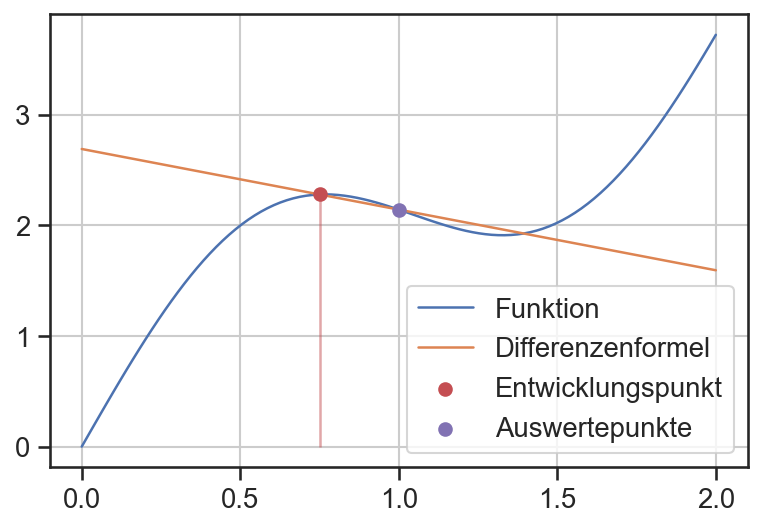

In [26]:
plt.plot(x, y, label="Funktion")
plt.scatter([x0], [f0], color='C3', label='Entwicklungspunkt', zorder=3)
plt.scatter([x0+h], [fh], color='C4', label='Auswertepunkte', zorder=3)

plt.vlines(x0, ymin=0, ymax=f0, color='C3', alpha=0.5)

plt.plot(x, f0 + fp*(x-x0), label='Differenzenformel')

plt.grid()
plt.legend();